# Subset EE cluster

In [151]:
suppressPackageStartupMessages({
    library(Seurat)
    library(velocyto.R)
    library(SeuratWrappers)
    library(scater)
    library(Matrix)
    library(dplyr)
    library(patchwork)
    library(ggplot2)
    library(readr)
})
options(warn=-1)
set.seed(1234)

In [53]:
## Parameters

# point size
point_size = 0.5
width_size = 6
height_size = 6

# color scheme
ident_colours = c('#8B93FF', #EB1
                  '#E18A00', #ISC1
                  '#FF65AC', #ISC2
                  '#00BBDA', #EC-like
                  '#24B700', #EB3
                  '#00BE70', #EB2
                  '#BE9C00', #mEC
                  '#00ACFC', #AstC+EE
                  '#D575FE', #apEC
                  '#F8766D') #Tk+EE
                  #'#8CAB00', #cluster0
                  #'#F962DD', #cluster1
                  #'#00C1AB')

In [54]:
# Load dataset
so <- readRDS('datasets/seurat/Seurat_aggr_QC2.rds')

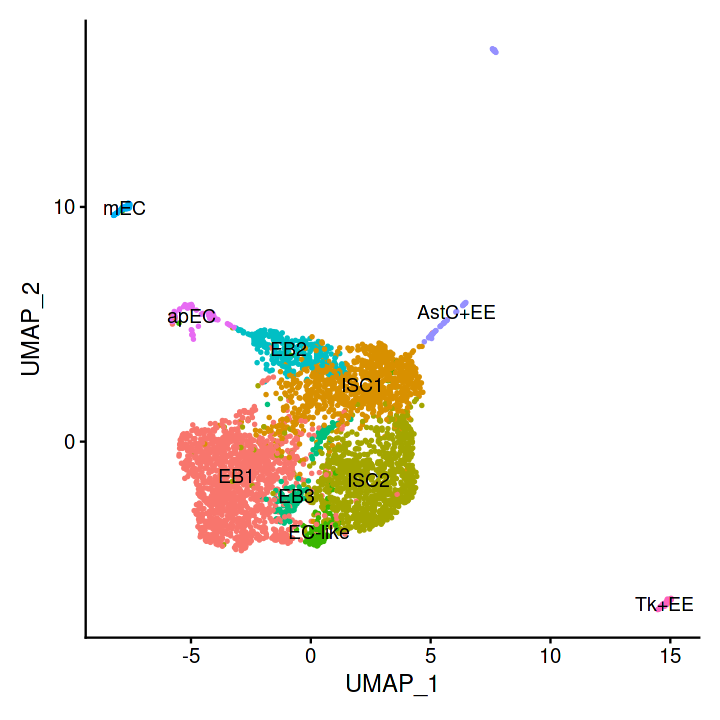

In [55]:
options(repr.plot.width = 6, repr.plot.height = 6)
DimPlot(object = so, reduction = "umap", pt.size = .5, label = TRUE, order = FALSE) + NoLegend()

In [56]:
# Subset the samples to work only on the cluster AstC+EE
astc <- subset(x=so, idents = 'AstC+EE')

In [57]:
astc

An object of class Seurat 
51496 features across 68 samples within 4 assays 
Active assay: SCT (9607 features, 3000 variable features)
 3 other assays present: unspliced, ambiguous, spliced
 2 dimensional reductions calculated: pca, umap

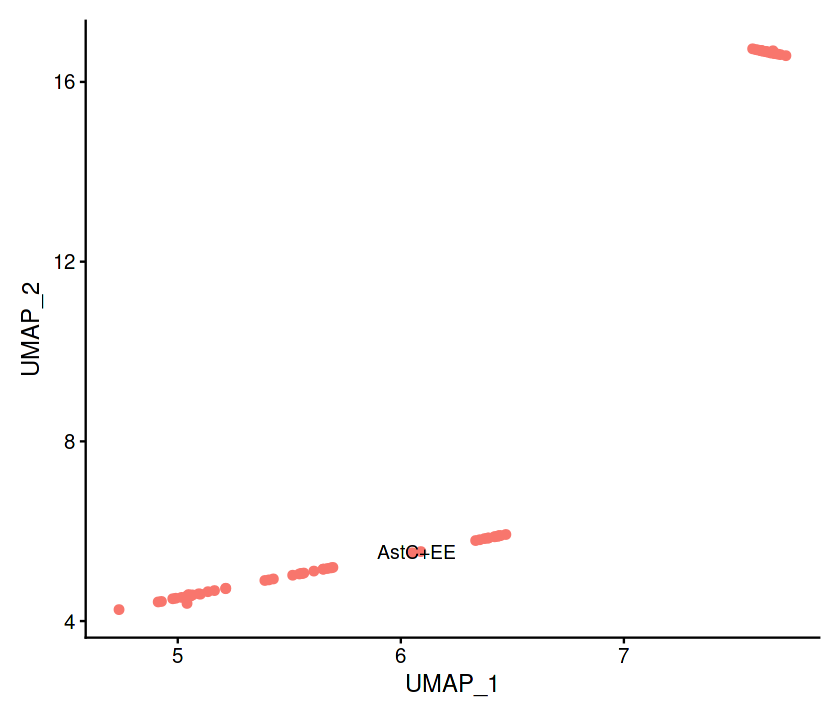

In [58]:
# Let's lot if the isolated cells represent the ones we are interested
options(repr.plot.width = 7, repr.plot.height = 6)
p1 <- DimPlot(object = astc, reduction = "umap", pt.size = 2, label = TRUE) + NoLegend()
p1

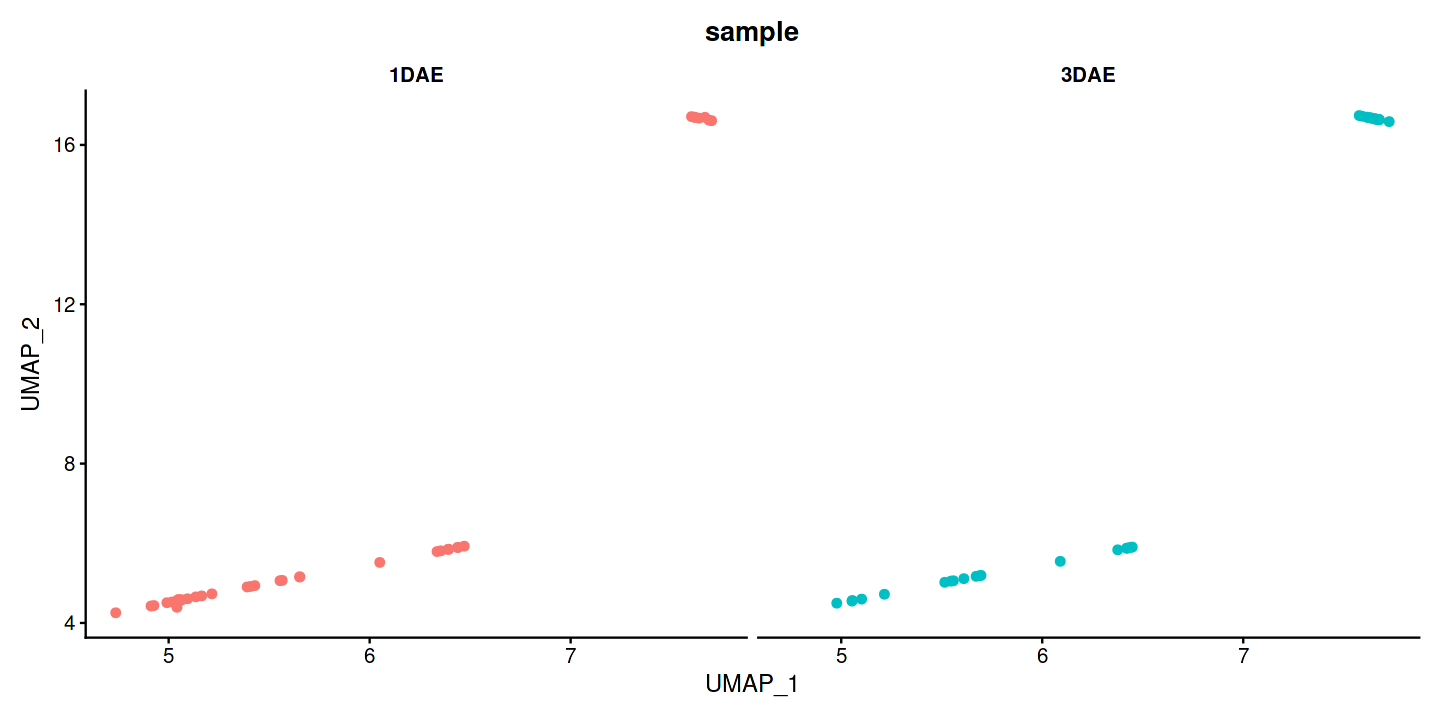

In [59]:
options(repr.plot.width = 12, repr.plot.height = 6)
p2 <- DimPlot(object = astc, reduction = "umap", split.by = "sample", group.by = "sample" ,pt.size = 2, ) + NoLegend()
p2

In [60]:
# How many cells in each sample?
table(astc@meta.data$sample)


1DAE 3DAE 
  36   32 

In [62]:
# Recompute the seurat analsis and discover marker genes. 
# If possible let's try to find two clusters

astc <- SCTransform(object = astc, assay = "spliced")
astc <- RunPCA(object = astc, verbose = FALSE)
astc <- FindNeighbors(object = astc, dims = 1:20)
astc <- FindClusters(object = astc)
astc <- RunUMAP(object = astc, dims = 1:20)
astc <- RunVelocity(object = astc, deltaT = 1, kCells = 25, fit.quantile = 0.02)

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 6147 by 68

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 68 cells



  |======================================================================| 100%


Found 66 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 6147 genes



  |======================================================================| 100%


Computing corrected count matrix for 6147 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 3.078151 secs

Determine variable features

Place corrected count matrix in counts slot

Centering data matrix

Set default assay to SCT

Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 68
Number of edges: 1403

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.5233
Number of communities: 2
Elapsed time: 0 seconds


16:05:42 UMAP embedding parameters a = 0.9922 b = 1.112

16:05:42 Read 68 rows and found 20 numeric columns

16:05:42 Using Annoy for neighbor search, n_neighbors = 30

16:05:42 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

16:05:42 Writing NN index file to temp file /tmp/RtmpkrkaQg/file170de544f49d6c

16:05:42 Searching Annoy index using 1 thread, search_k = 3000

16:05:42 Annoy recall = 100%

16:05:43 Commencing smooth kNN distance calibration using 1 thread

16:05:45 Initializing from normalized Laplacian + noise

16:05:45 Commencing optimization for 500 epochs, with 2068 positive edges

16:05:47 Optimization finished

Filtering genes in the spliced matrix

Filtering genes in the unspliced matrix

Calculating embedding distance matrix



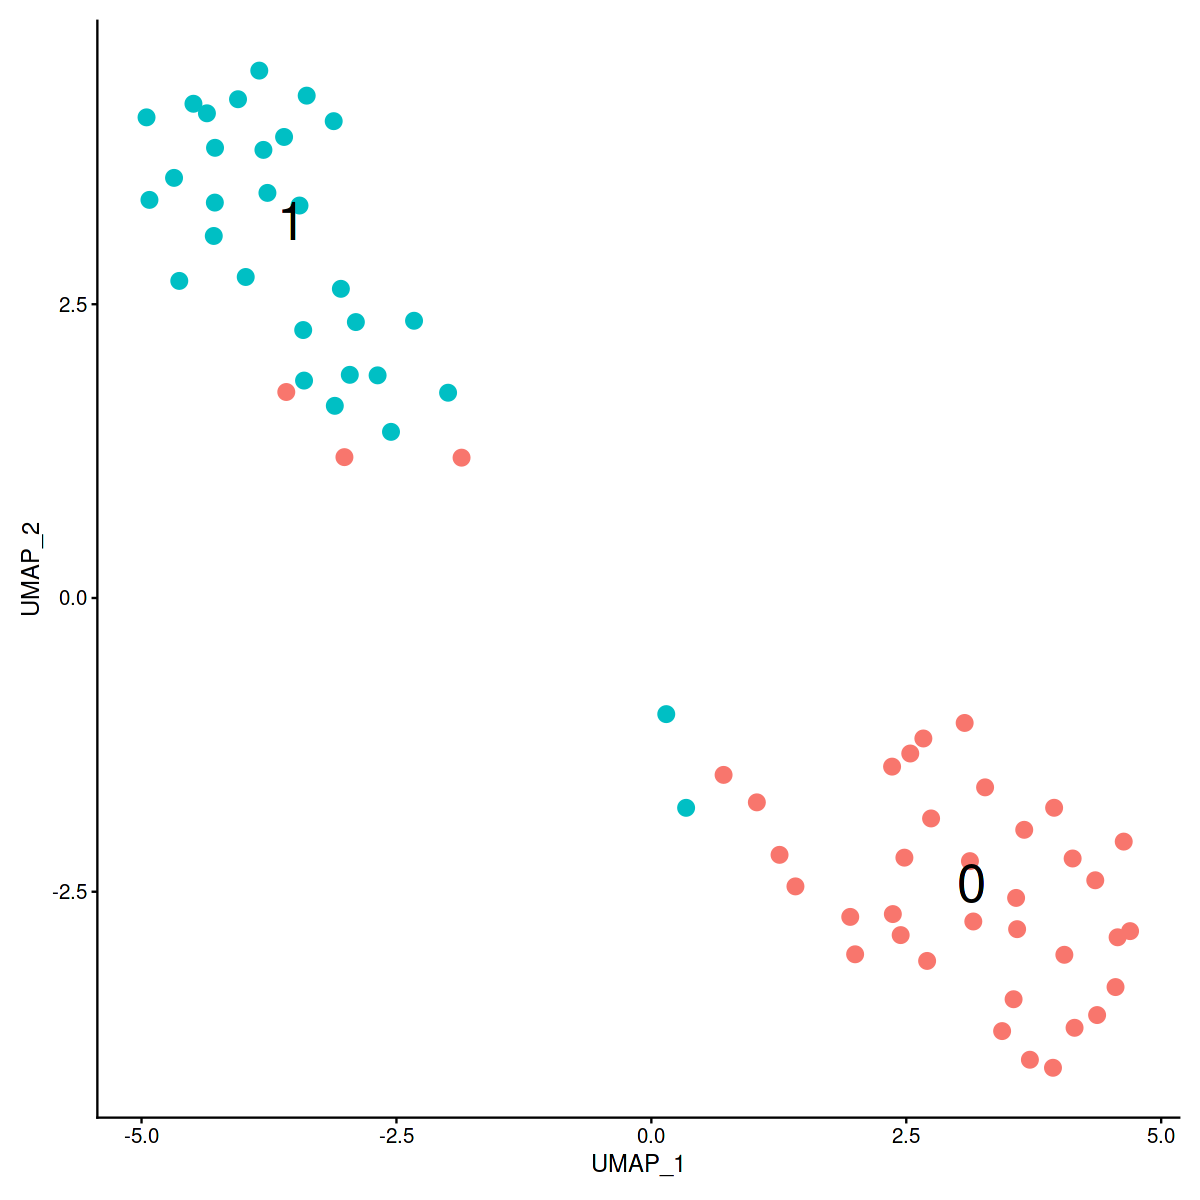

In [63]:
# Let's see how the new clusters of cells look like
options(repr.plot.width = 10, repr.plot.height = 10)
DimPlot(object = astc, reduction = "umap", pt.size = 4, label = TRUE, label.size = 11) + NoLegend()
ggsave(file="results/subset_AstC_EE/AstC_subclusters.pdf", width=10, height=10)

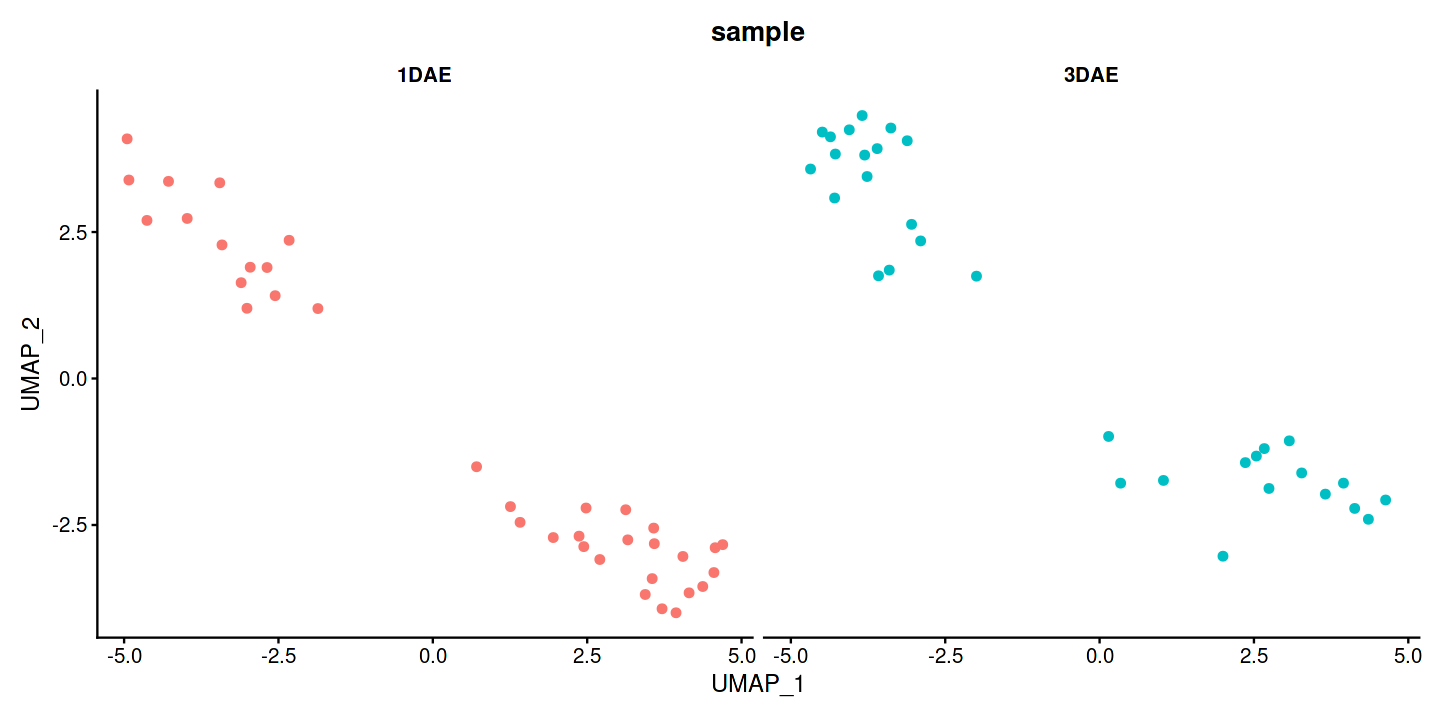

In [64]:
options(repr.plot.width = 12, repr.plot.height = 6)
DimPlot(object = astc, reduction = "umap", split.by = "sample", group.by = "sample" ,pt.size = 2)  + NoLegend()
ggsave(file="results/subset_AstC_EE/AstC_subclusters_sample.pdf", width=12, height=6)

delta projections ... sqrt knn ... transition probs ... done
calculating arrows ... done
grid estimates ... grid.sd= 0.361115  min.arrow.size= 0.007222299  max.grid.arrow.length= 0.09078255  done


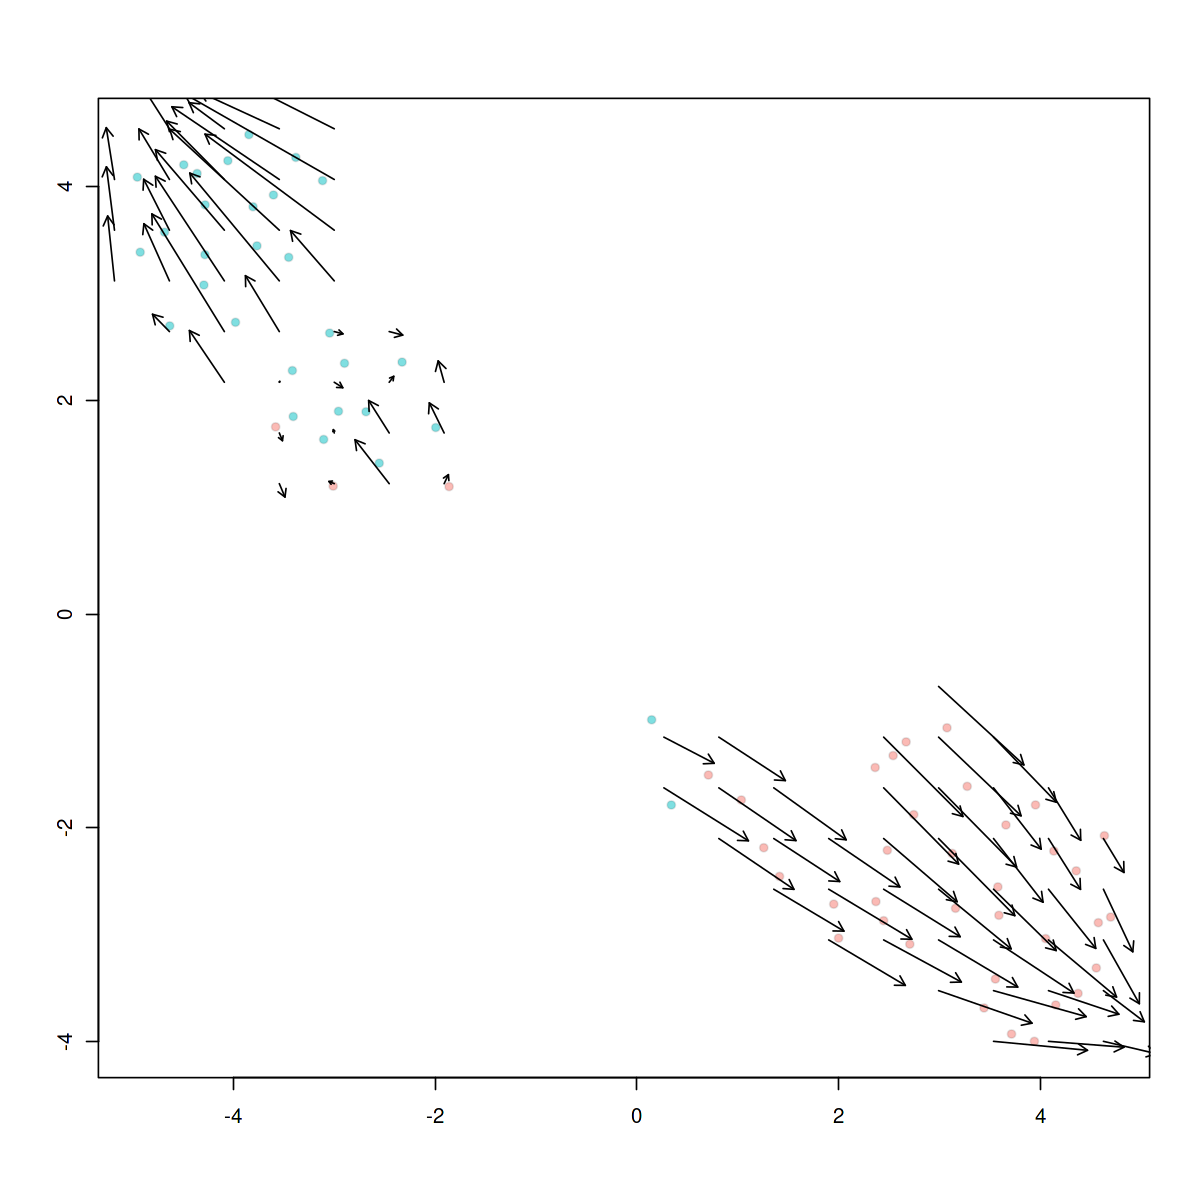

In [65]:
# show the RNA velocity
ident.colors <- (scales::hue_pal())(n = length(x = levels(x = astc)))
names(x = ident.colors) <- levels(x = astc)
cell.colors <- ident.colors[Idents(object = astc)]
names(x = cell.colors) <- colnames(x = astc)

options(repr.plot.width = 10, repr.plot.height = 10)
show.velocity.on.embedding.cor(emb = Embeddings(object = astc, reduction = "umap"), vel = Tool(object = astc, 
    slot = "RunVelocity"), n = 200, scale = "sqrt", cell.colors = ac(x = cell.colors, alpha = 0.5), 
    cex = 0.8, arrow.scale = 2, show.grid.flow = TRUE, min.grid.cell.mass = 1, grid.n = 20, arrow.lwd = 1, 
    do.par = FALSE, cell.border.alpha = 0.1)

In [66]:
# Find DEGs in cluster 0 against cluster 1
astc.markers_0 <- FindMarkers(astc, 
                            ident.1 = "0", 
                            ident.2 = "1", 
                            logfc.threshold = log(2), #Pre-filter features that have less than a two-fold change between the average expression of
                            min.diff.pct = -Inf,
                            #assay = 'RNA',
                            min.pct = 0.1,  #0.1
                            test.use = 'wilcox',  #wilcox/MAST
                            only.pos = TRUE)
astc.markers_0$gene <- row.names(astc.markers_0)
astc.markers_0.sig <- astc.markers_0 %>% filter(p_val_adj < 0.05) %>% arrange(desc(avg_log2FC))

# save 
write.table(astc.markers_0.sig, file = 'results/subset_AstC_EE/astc.markers_0.sig.tsv', quote = FALSE, sep = '\t', col.names = TRUE, row.names = FALSE)
astc.markers_0.sig

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
E(spl)m6-BFM,2.066486e-06,3.476586,0.553,0.000,1.270269e-02,E(spl)m6-BFM
E(spl)m7-HLH,9.956310e-07,3.321065,0.763,0.367,6.120144e-03,E(spl)m7-HLH
Tet,2.966126e-10,2.262304,0.974,0.633,1.823277e-06,Tet
Dl,1.126022e-06,2.254573,0.763,0.267,6.921658e-03,Dl
rst,8.100138e-10,2.188583,0.816,0.033,4.979155e-06,rst
HmgD,1.120298e-08,2.095875,0.974,0.767,6.886473e-05,HmgD
Df31,5.088922e-10,2.082546,1.000,0.967,3.128161e-06,Df31
lbm,8.345189e-10,2.045986,0.947,0.467,5.129787e-06,lbm
E(spl)malpha-BFM,9.101912e-07,1.958081,0.842,0.300,5.594945e-03,E(spl)malpha-BFM


In [67]:
# Find DEGs in cluster 1 against cluster 0
astc.markers_1 <- FindMarkers(astc, 
                            ident.1 = "1", 
                            ident.2 = "0", 
                            logfc.threshold = log(2),
                            min.diff.pct = -Inf,
                            #assay = 'RNA',
                            min.pct = 0.1,
                            test.use = 'wilcox',  #wilcox/MAST
                            only.pos = TRUE)
astc.markers_1$gene <- row.names(astc.markers_1)
astc.markers_1.sig <- astc.markers_1 %>% filter(p_val_adj < 0.05) %>% arrange(desc(avg_log2FC))

# save 
write.table(astc.markers_1.sig, file = 'results/subset_AstC_EE/astc.markers_1.sig.tsv', quote = FALSE, sep = '\t', col.names = TRUE, row.names = FALSE)
astc.markers_1.sig

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Orcokinin,1.369909e-11,5.110257,0.967,0.184,8.420829e-08,Orcokinin
AstC,7.983155e-12,4.446598,1.000,0.237,4.907245e-08,AstC
CG14989,2.848703e-11,4.430714,0.967,0.211,1.751098e-07,CG14989
IA-2,1.781305e-12,4.241325,1.000,0.263,1.094968e-08,IA-2
CG4577,3.163257e-12,4.023641,1.000,0.237,1.944454e-08,CG4577
CG43207,2.892886e-10,3.910569,0.833,0.079,1.778257e-06,CG43207
amon,2.409694e-13,3.710271,1.000,0.132,1.481239e-09,amon
unc-13-4A,1.696320e-11,3.707942,0.900,0.079,1.042728e-07,unc-13-4A
CG17778,6.314513e-08,3.673794,0.933,0.737,3.881531e-04,CG17778


In [68]:
#cluster 0

# select the genes that are highly expressed and change the order of the names
astc.markers_0.sig.fc <- astc.markers_0.sig %>% filter(avg_log2FC > 1) %>% arrange(desc(avg_log2FC)) %>% dplyr::select(gene, everything())

dim(astc.markers_0.sig.fc)
head(astc.markers_0.sig.fc)
tail(astc.markers_0.sig.fc)

# save results
write.table(astc.markers_0.sig.fc, file = 'results/subset_AstC_EE/astc.markers_0.sig.fc.tsv', quote = FALSE, sep = '\t', col.names = TRUE, row.names = FALSE)

[1] 59  6

,gene,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
E(spl)m6-BFM,E(spl)m6-BFM,2.066486e-06,3.476586,0.553,0.000,1.270269e-02
E(spl)m7-HLH,E(spl)m7-HLH,9.956310e-07,3.321065,0.763,0.367,6.120144e-03
Tet,Tet,2.966126e-10,2.262304,0.974,0.633,1.823277e-06
Dl,Dl,1.126022e-06,2.254573,0.763,0.267,6.921658e-03
rst,rst,8.100138e-10,2.188583,0.816,0.033,4.979155e-06
HmgD,HmgD,1.120298e-08,2.095875,0.974,0.767,6.886473e-05


,gene,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
pzg,pzg,6.762238e-06,1.044617,0.553,0.033,4.156748e-02
RpL15,RpL15,3.380350e-09,1.039246,1.000,1.000,2.077901e-05
RpS8,RpS8,1.169916e-10,1.025972,1.000,1.000,7.191475e-07
Clic,Clic,1.554443e-06,1.016120,0.974,0.833,9.555158e-03
eEF1beta,eEF1beta,6.713008e-09,1.013056,1.000,1.000,4.126486e-05
RpL13,RpL13,2.971086e-11,1.003842,1.000,1.000,1.826327e-07


In [69]:
#cluster 1

# select the genes that are highly expressed and change the order of the names
astc.markers_1.sig.fc <- astc.markers_1.sig %>% filter(avg_log2FC > 1) %>% arrange(desc(avg_log2FC)) %>% dplyr::select(gene, everything())

dim(astc.markers_1.sig.fc)
head(astc.markers_1.sig.fc)
tail(astc.markers_1.sig.fc)

# save results
write.table(astc.markers_1.sig.fc, file = 'results/subset_AstC_EE/astc.markers_1.sig.fc.tsv', quote = FALSE, sep = '\t', col.names = TRUE, row.names = FALSE)

[1] 112   6

,gene,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Orcokinin,Orcokinin,1.369909e-11,5.110257,0.967,0.184,8.420829e-08
AstC,AstC,7.983155e-12,4.446598,1.000,0.237,4.907245e-08
CG14989,CG14989,2.848703e-11,4.430714,0.967,0.211,1.751098e-07
IA-2,IA-2,1.781305e-12,4.241325,1.000,0.263,1.094968e-08
CG4577,CG4577,3.163257e-12,4.023641,1.000,0.237,1.944454e-08
CG43207,CG43207,2.892886e-10,3.910569,0.833,0.079,1.778257e-06


,gene,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Pglym78,Pglym78,3.561491e-06,1.104597,0.967,0.579,0.021892485
CG15312,CG15312,1.814788e-06,1.100029,0.533,0.026,0.011155505
CG8839,CG8839,4.861154e-06,1.096352,0.967,0.789,0.029881512
Tsp29Fa,Tsp29Fa,1.170561e-06,1.072976,0.967,0.737,0.007195438
l(1)G0289,l(1)G0289,2.517368e-06,1.015637,0.800,0.263,0.015474259
Acph-1,Acph-1,6.198735e-06,1.002235,0.633,0.132,0.038103623


In [70]:
# Save the subcluster files
saveRDS(astc, file = "datasets/seurat/Seurat_AstCEE_subclusters.rds")

# Plots

In [155]:
# Rename AstC+EE to AstC+EE_0 and AstC+EE_1
Idents(object = so, cells = WhichCells(astc, idents = '0')) <- 'AstC+EE_0'
Idents(object = so, cells = WhichCells(astc, idents = '1')) <- 'AstC+EE_1'

In [156]:
so[["subclusters"]] <- Idents(object = so)

In [157]:
table(Idents(so))


AstC+EE_1 AstC+EE_0       EB1      ISC1      ISC2   EC-like       EB3       EB2 
       30        38      1418       930      1032       108       144       298 
      mEC      apEC     Tk+EE 
       50        82        54 

In [158]:
table(so$subclusters)


AstC+EE_1 AstC+EE_0       EB1      ISC1      ISC2   EC-like       EB3       EB2 
       30        38      1418       930      1032       108       144       298 
      mEC      apEC     Tk+EE 
       50        82        54 

In [159]:
# change the color of the plots according to the UMAP

In [208]:
# Reorder idents
Idents(object = so) <- so$subclusters
levels(so) <- c('AstC+EE_1','AstC+EE_0','EB1','ISC1','ISC2','EC-like','EB3','EB2','mEC','apEC','Tk+EE')
levels(so)

[1] "AstC+EE_1" "AstC+EE_0" "EB1"       "ISC1"      "ISC2"      "EC-like"  
 [7] "EB3"       "EB2"       "mEC"       "apEC"      "Tk+EE"

In [209]:
table(Idents(so))


AstC+EE_1 AstC+EE_0       EB1      ISC1      ISC2   EC-like       EB3       EB2 
       30        38      1418       930      1032       108       144       298 
      mEC      apEC     Tk+EE 
       50        82        54 

In [210]:
# Color for the clusters
ident_colours = c('#00ACFC', #cluster1
                  '#8CAB00', #cluster0
                  #'', #cluster1
                  '#8B93FF', #EB1
                  '#E18A00', #ISC1
                  '#FF65AC', #ISC2
                  '#00BBDA', #EC-like
                  '#24B700', #EB3
                  '#00BE70', #EB2
                  '#BE9C00', #mEC
                  #'#00ACFC', #AstC+EE
                  '#D575FE', #apEC
                  '#F8766D')#, #Tk+EE
                  #'#1857cc', #new color cluster1
                  #'#4daf4a') #cluster0

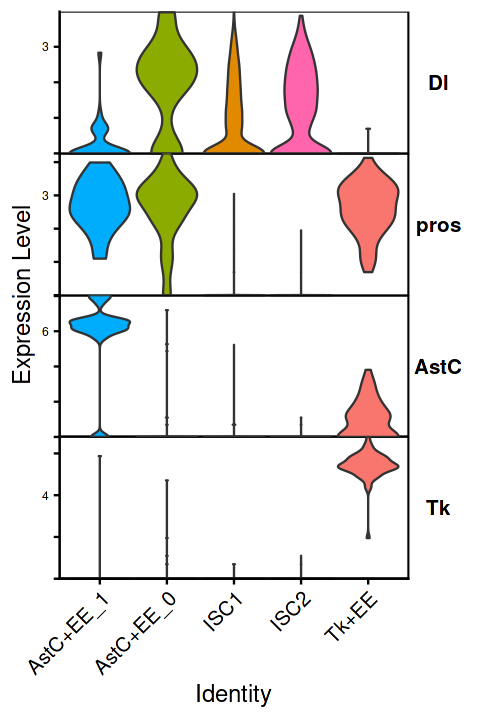

In [211]:
# Violin plot for marker genes 'DI', 'pros', 'AstC', 'Tk'
# Cells to use are subcluster0, subcluster1, Tk+EE, ISC1, ISC2

list.genes <- c('Dl', 'pros', 'AstC', 'Tk')

#Idents(object = so) <- so$clusters

options(repr.plot.width = 4, repr.plot.height = 6)
VlnPlot(object = so, split.by = "subclusters",
        cols = ident_colours,
        stack = TRUE, flip = TRUE,
        features = list.genes ,
        fill.by = "ident",
        idents = c("AstC+EE_1", "AstC+EE_0", "Tk+EE", "ISC1", "ISC2")) + NoLegend()
ggsave(file="results/subset_AstC_EE/Fig3f_ViolinPlot_subclusters_included.pdf", width=4, height=6)

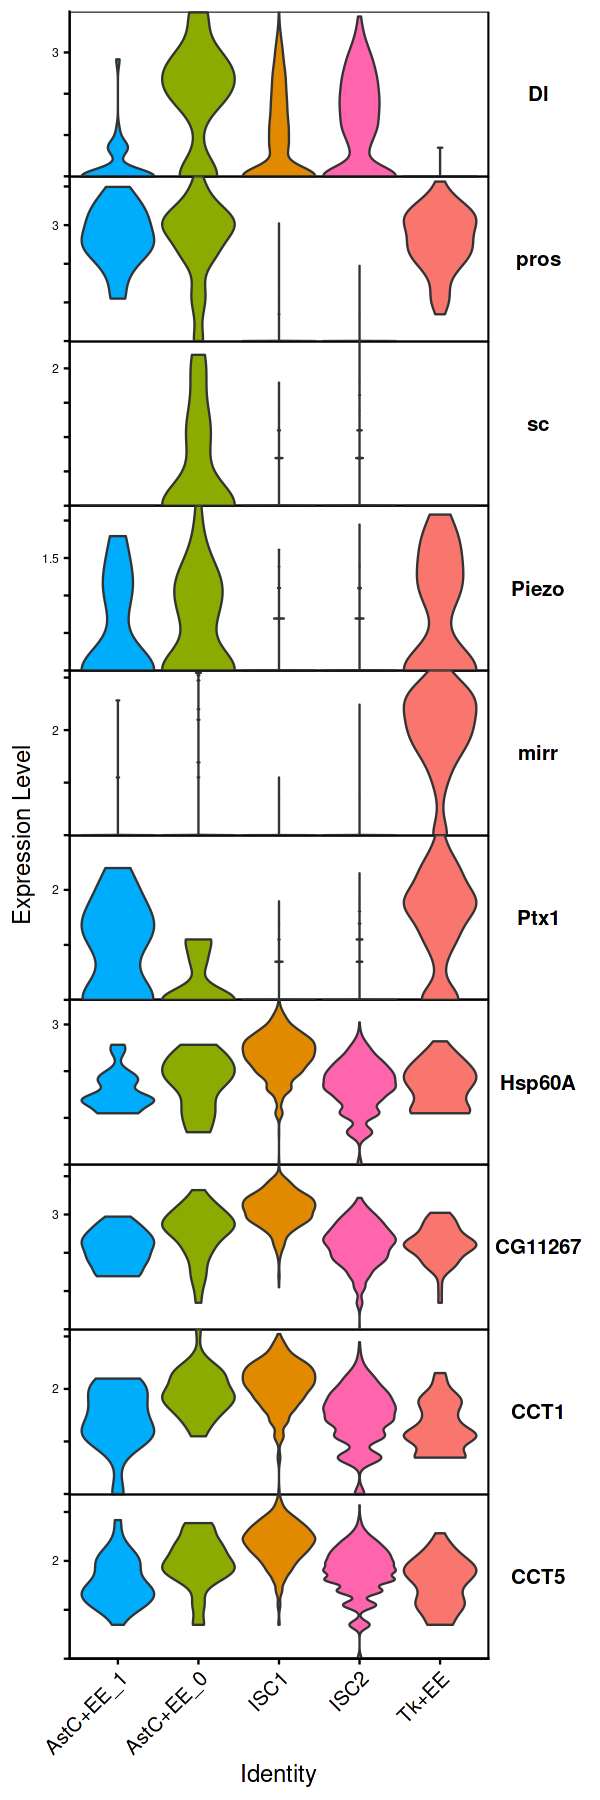

In [212]:
list.genes1 <- c("Dl", "pros", "sc", "Piezo", "mirr", "Ptx1", "mira", "Hsp60A", "CG11267", "CCT1", "CCT5")

options(repr.plot.width = 5, repr.plot.height = 15)
VlnPlot(object = so, split.by = "subclusters",
        cols = ident_colours,
        stack = TRUE, flip = TRUE,
        features = list.genes1 ,
        ncol = 4,
        idents = c("AstC+EE_0", "AstC+EE_1", "Tk+EE", "ISC1", "ISC2")) + NoLegend()
ggsave(file="results/subset_AstC_EE/Fig3f_ViolinPlot_geneset1.pdf", width=5, height=15)

In [213]:
head(astc.markers_0.sig.fc, 10)
#astc.markers_1.sig.fc

,gene,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
E(spl)m6-BFM,E(spl)m6-BFM,2.066486e-06,3.476586,0.553,0.000,1.270269e-02
E(spl)m7-HLH,E(spl)m7-HLH,9.956310e-07,3.321065,0.763,0.367,6.120144e-03
Tet,Tet,2.966126e-10,2.262304,0.974,0.633,1.823277e-06
Dl,Dl,1.126022e-06,2.254573,0.763,0.267,6.921658e-03
rst,rst,8.100138e-10,2.188583,0.816,0.033,4.979155e-06
HmgD,HmgD,1.120298e-08,2.095875,0.974,0.767,6.886473e-05
Df31,Df31,5.088922e-10,2.082546,1.000,0.967,3.128161e-06
lbm,lbm,8.345189e-10,2.045986,0.947,0.467,5.129787e-06
E(spl)malpha-BFM,E(spl)malpha-BFM,9.101912e-07,1.958081,0.842,0.300,5.594945e-03


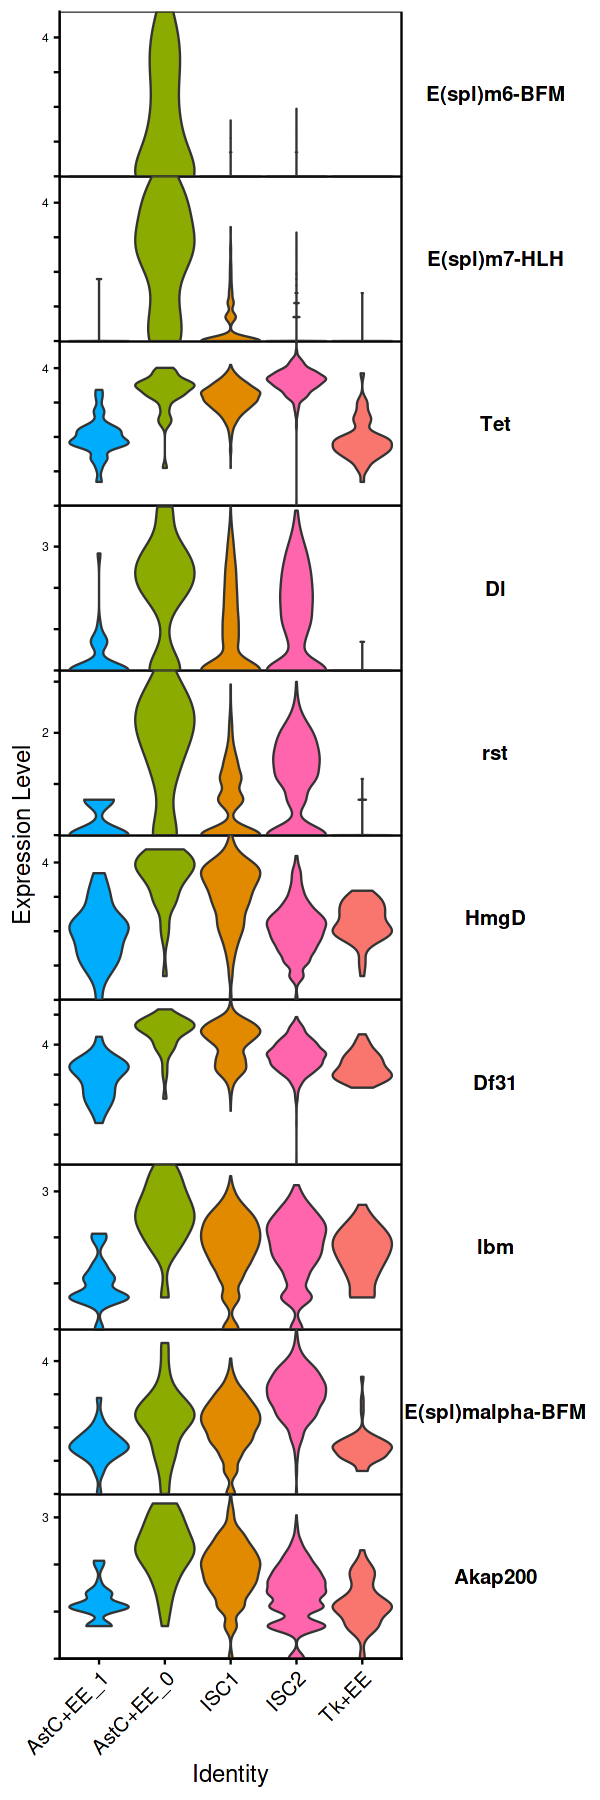

In [216]:
options(repr.plot.width = 5, repr.plot.height = 15)
VlnPlot(object = so, split.by = "subclusters",
        cols = ident_colours,
        stack = TRUE, flip = TRUE,
        features = head(astc.markers_0.sig.fc$gene, 10) ,
        ncol = 4,
        idents = c("AstC+EE_1", "AstC+EE_0", "Tk+EE", "ISC1", "ISC2")) + NoLegend()
ggsave(file="results/subset_AstC_EE/Fig3f_ViolinPlot_sub0_DEGs.pdf", width=5, height=15)

In [217]:
head(astc.markers_1.sig.fc, 10)
#astc.markers_1.sig.fc

,gene,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Orcokinin,Orcokinin,1.369909e-11,5.110257,0.967,0.184,8.420829e-08
AstC,AstC,7.983155e-12,4.446598,1.000,0.237,4.907245e-08
CG14989,CG14989,2.848703e-11,4.430714,0.967,0.211,1.751098e-07
IA-2,IA-2,1.781305e-12,4.241325,1.000,0.263,1.094968e-08
CG4577,CG4577,3.163257e-12,4.023641,1.000,0.237,1.944454e-08
CG43207,CG43207,2.892886e-10,3.910569,0.833,0.079,1.778257e-06
amon,amon,2.409694e-13,3.710271,1.000,0.132,1.481239e-09
unc-13-4A,unc-13-4A,1.696320e-11,3.707942,0.900,0.079,1.042728e-07
CG17778,CG17778,6.314513e-08,3.673794,0.933,0.737,3.881531e-04


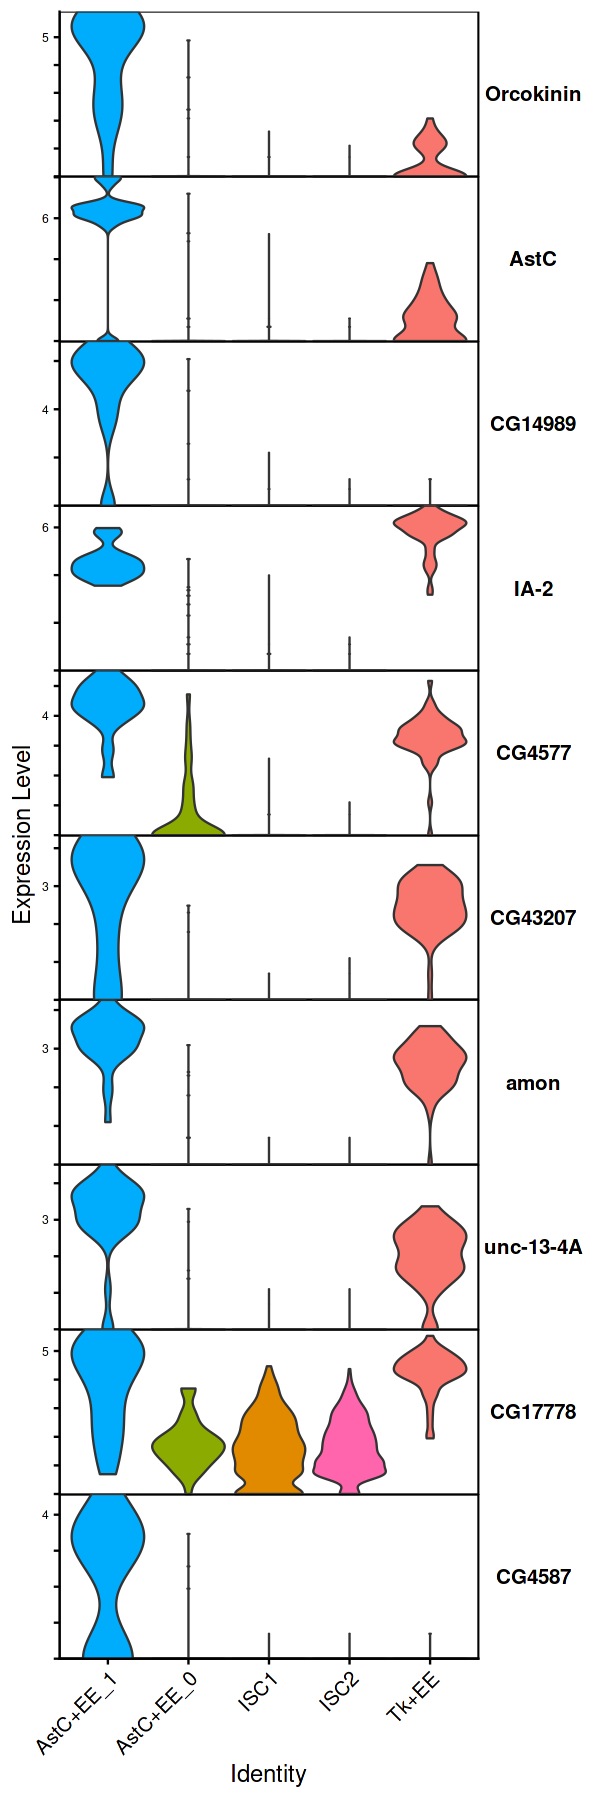

In [218]:
options(repr.plot.width = 5, repr.plot.height = 15)
VlnPlot(object = so, split.by = "subclusters",
        cols = ident_colours,
        stack = TRUE, flip = TRUE,
        features = head(astc.markers_1.sig.fc$gene, 10) ,
        ncol = 4,
        idents = c("AstC+EE_1", "AstC+EE_0", "Tk+EE", "ISC1", "ISC2")) + NoLegend()
ggsave(file="results/subset_AstC_EE/Fig3f_ViolinPlot_sub1_DEGs.pdf", width=5, height=15)

In [199]:
table(Idents(so))


AstC+EE_1 AstC+EE_0       EB1      ISC1      ISC2   EC-like       EB3       EB2 
       30        38      1418       930      1032       108       144       298 
      mEC      apEC     Tk+EE 
       50        82        54 

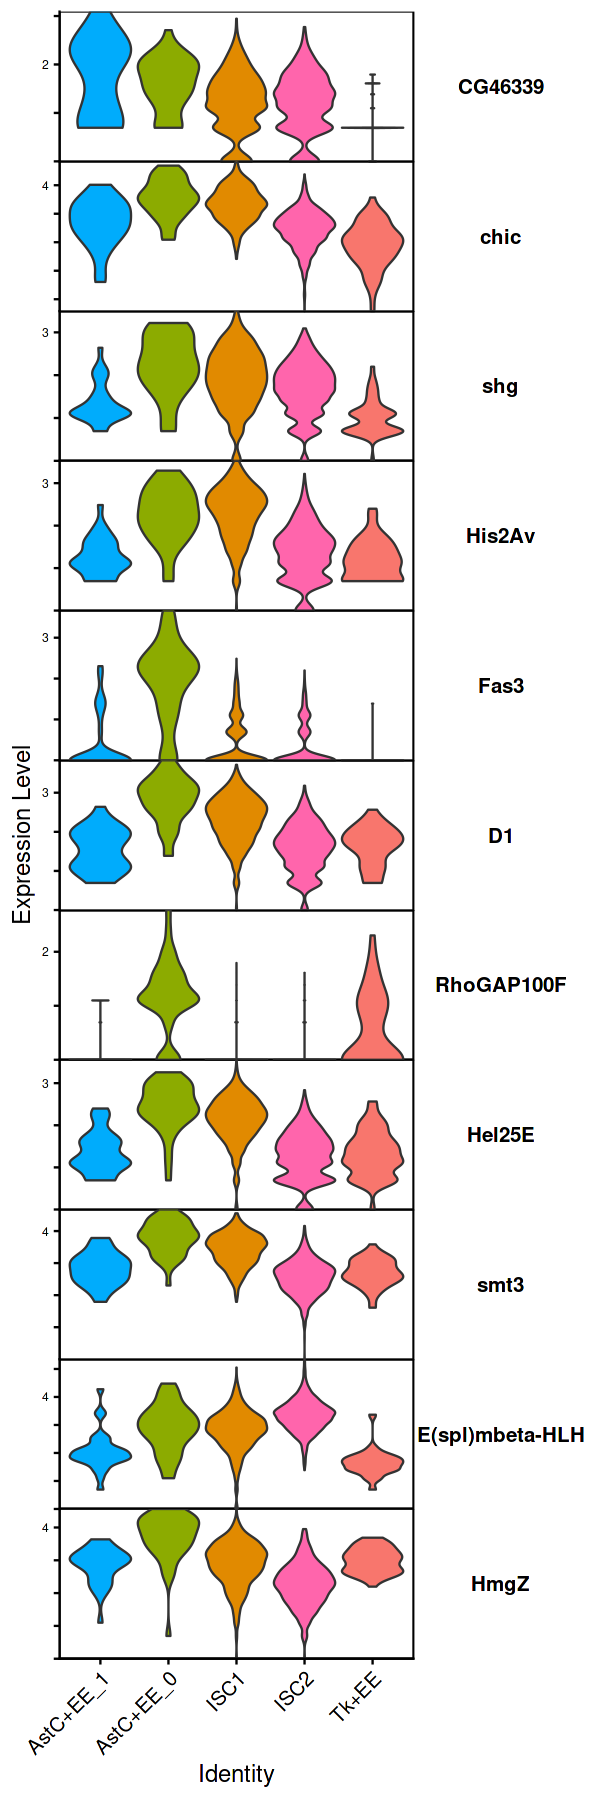

In [200]:
list.genes3 <- c("CG46339", "chic", "shg", "His2Av", "Fas3", "D1", "RhoGAP100F", "Hel25E", "smt3", "E(spl)mbeta-HLH", "HmgZ")

options(repr.plot.width = 5, repr.plot.height = 15)
VlnPlot(object = so, split.by = "subclusters",
        #cols = c('#8B93FF', '#8B93FF', '#8B93FF', '#8B93FF', '#8B93FF'),
        cols = ident_colours,
        stack = TRUE, flip = TRUE,
        features = list.genes3 ,
        ncol = 4,
        idents = c("AstC+EE_0", "AstC+EE_1", "Tk+EE", "ISC1", "ISC2")) + NoLegend()
ggsave(file="results/subset_AstC_EE/Fig3f_ViolinPlot_invivo_tested.pdf", width=5, height=15)

In [201]:
levels(so)

[1] "AstC+EE_1" "AstC+EE_0" "EB1"       "ISC1"      "ISC2"      "EC-like"  
 [7] "EB3"       "EB2"       "mEC"       "apEC"      "Tk+EE"